<a href="https://colab.research.google.com/github/vnylp/JupyterNotebookCodes/blob/master/LupinCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Problem statement

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Lupin/DS_data_for_Analysis[002].csv')

Which factors affect the covid cases & deaths and at what extent

In [4]:
df.shape

(94867, 60)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_corr=df.corr()

In [7]:
casesanddeathrate =df_corr[['new_cases','new_cases_smoothed','new_deaths','new_deaths_smoothed']].reset_index().sort_values('new_cases',ascending=False)

In [8]:
vaccinateddeathrate= df_corr[['new_vaccinations','people_fully_vaccinated']].reset_index().sort_values('people_fully_vaccinated',ascending=False)

Classify/cluster the best and worst countries to live in

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [10]:
df.isna().sum()

iso_code                                     0
continent                                 4480
location                                     0
date                                         0
total_cases                               3107
new_cases                                 3110
new_cases_smoothed                        4120
total_deaths                             13086
new_deaths                               12930
new_deaths_smoothed                       4120
total_cases_per_million                   3597
new_cases_per_million                     3600
new_cases_smoothed_per_million            4605
total_deaths_per_million                 13563
new_deaths_per_million                   13407
new_deaths_smoothed_per_million           4605
reproduction_rate                        18556
icu_patients                             85346
icu_patients_per_million                 85346
hosp_patients                            83050
hosp_patients_per_million                83050
weekly_icu_ad

To Define best and worst countries we can use simple segmentation technique using quantiles

In [11]:
countrydf=df[['location', 'date','new_deaths_per_million','new_cases_per_million']]

In [12]:
deathdistribution=pd.pivot_table(countrydf,index='location',values=['new_deaths_per_million'],aggfunc='mean').sort_values('new_deaths_per_million').reset_index()

Anything higher than median death considering as bad country to live in

In [13]:
badcountriestolivein= deathdistribution[deathdistribution['new_deaths_per_million']>deathdistribution.median().values[0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [14]:
badcountriestolivein.location.values

array(['Jamaica', 'Nepal', 'Saint Vincent and the Grenadines',
       'Dominican Republic', 'El Salvador', 'Maldives', 'Botswana',
       'Iraq', 'Cyprus', 'World', 'Denmark', 'Kuwait',
       'Antigua and Barbuda', 'Trinidad and Tobago', 'Guatemala', 'Libya',
       'Azerbaijan', 'Cape Verde', 'Oman', 'Namibia', 'Guyana', 'Turkey',
       'Bahamas', 'Eswatini', 'Canada', 'Honduras', 'Suriname', 'Bahrain',
       'Palestine', 'Israel', 'Albania', 'Costa Rica', 'Russia', 'Belize',
       'Monaco', 'Iran', 'Saint Lucia', 'Jordan', 'Estonia', 'Ireland',
       'South Africa', 'Malta', 'Netherlands', 'Serbia', 'Germany',
       'Lebanon', 'Tunisia', 'Austria', 'Greece', 'Ecuador', 'Kosovo',
       'Ukraine', 'Switzerland', 'Europe', 'Luxembourg', 'Georgia',
       'Seychelles', 'North America', 'Latvia', 'Bolivia', 'Sweden',
       'Uruguay', 'Panama', 'European Union', 'Paraguay', 'Moldova',
       'France', 'Armenia', 'Liechtenstein', 'Chile', 'Lithuania',
       'Romania', 'Andorra', 'S

Anything lower than median considering as good country to live in

In [15]:
goodcountriestolivein=deathdistribution[deathdistribution['new_deaths_per_million']<deathdistribution.median().values[0]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [16]:
goodcountriestolivein.location.values

array(['Tanzania', 'Burundi', 'Vietnam', 'China', 'Bhutan', 'New Zealand',
       'Laos', 'Singapore', 'Fiji', 'Brunei', 'Burkina Faso', 'Niger',
       'Benin', 'Democratic Republic of Congo', 'Nigeria', 'Tajikistan',
       'Sierra Leone', 'Chad', 'South Sudan', 'Eritrea', "Cote d'Ivoire",
       'Uganda', 'Guinea', 'Taiwan', 'Mauritius', 'Togo', 'Liberia',
       'Thailand', 'Uzbekistan', 'Oceania', 'Central African Republic',
       'Grenada', 'Angola', 'Hong Kong', 'Ghana', 'Papua New Guinea',
       'Mali', 'Vanuatu', 'Nicaragua', 'Congo', 'Haiti', 'Mozambique',
       'Rwanda', 'Australia', 'Madagascar', 'South Korea',
       'Guinea-Bissau', 'Ethiopia', 'Yemen', 'Cameroon', 'Somalia',
       'Myanmar', 'Sudan', 'Malawi', 'Kenya', 'Gabon', 'Senegal',
       'Gambia', 'Zambia', 'Bangladesh', 'Algeria', 'Iceland',
       'Afghanistan', 'Cambodia', 'Equatorial Guinea', 'Sri Lanka',
       'Africa', 'Timor', 'Cuba', 'Pakistan', 'Venezuela', 'Japan',
       'Mauritania', 'Syria', 'Zi

Predict no of covid cases 

In [19]:
df['date']=pd.to_datetime(df['date'])

In [20]:
ts=pd.DataFrame(df.groupby('date').sum()['new_cases'])

We can try various models to do the prediction

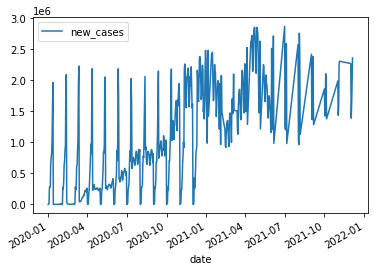

In [21]:
ts.plot()

In [22]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 1, 1)) 
results_ARIMA = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
results_ARIMA

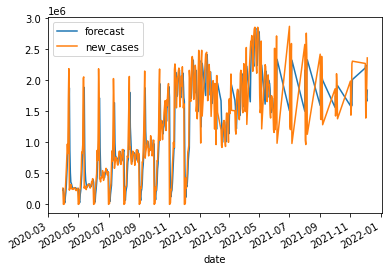

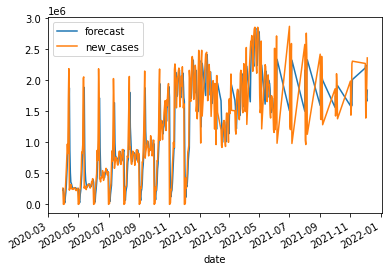

In [23]:
results_ARIMA.plot_predict(start=90)

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ts['new_cases'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
ts['forecast']=results.predict(start=300,end=400,dynamic=True)
ts[['new_cases','forecast']].plot(figsize=(12,8))

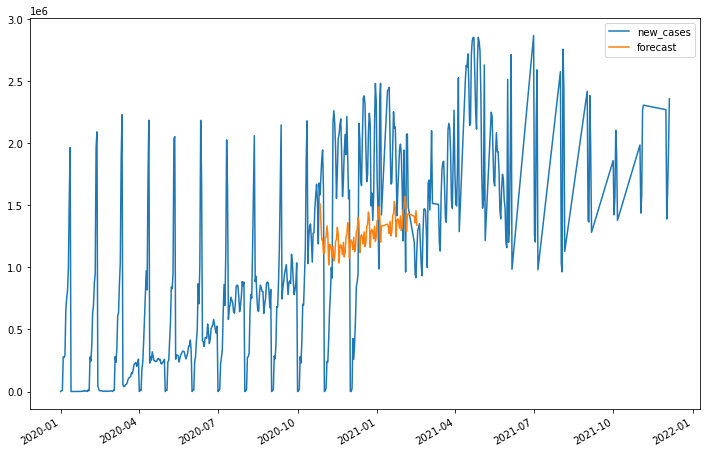

In [71]:
from pandas.tseries.offsets import DateOffset
future_dates=[ts.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([ts,future_datest_df])

future_df['forecast'] = results.predict(start = 300, end = 400, dynamic= True)
future_df[['new_cases', 'forecast']].plot(figsize=(12, 8))

In [64]:
ts.index.max()

Timestamp('2021-12-05 00:00:00')

DatetimeIndex(['2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
      

In [74]:
forecast = pd.DataFrame(results.predict(start = 527, end = 616, dynamic= True))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [76]:
forecast['date']=pd.date_range(ts.index.max(), periods=90, freq='D')

In [79]:
forecast=forecast[['date',0]]

In [81]:
forecast.columns=['date','new_cases']

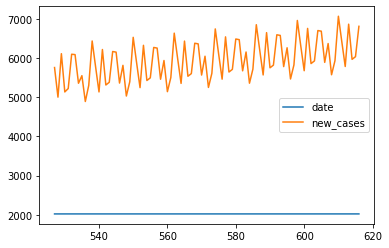

In [82]:
forecast.plot()